# Data Preparation and Data Visualization of Customers Personality Analysis

Customer personality analysis helps a business to modify its product based on its target customers from different types of customers segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment. In this project, we are going to do analysis and data visualization of a customer personality. For the data visualization, we going to use Google Data Studio. I got the data from Kaggle: https://www.kaggle.com/imakash3011/customer-personality-analysis?select=marketing_campaign.csv

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Dataset

I got the dataset from Kaggle. it's consists of 29 columns with 2240 rows. Data contains the customer's personality such ID, Year_Birth, Education, Marital_Status, Income, etc. And it contains information about the amount customers spent on which product company have, how they buy it, and how long customers become company members.

**COLUMNS INFORMATION**

**People**

    ID: Customer's unique identifier
    Year_Birth: Customer's birth year
    Education: Customer's education level
    Marital_Status: Customer's marital status
    Income: Customer's yearly household income
    Kidhome: Number of children in customer's household
    Teenhome: Number of teenagers in customer's household
    Dt_Customer: Date of customer's enrollment with the company
    Recency: Number of days since customer's last purchase
    Complain: 1 if the customer complained in the last 2 years, 0 otherwise

**Products**

    MntWines: Amount spent on wine in last 2 years
    MntFruits: Amount spent on fruits in last 2 years
    MntMeatProducts: Amount spent on meat in last 2 years
    MntFishProducts: Amount spent on fish in last 2 years
    MntSweetProducts: Amount spent on sweets in last 2 years
    MntGoldProds: Amount spent on gold in last 2 years

**Promotion**

    NumDealsPurchases: Number of purchases made with a discount
    AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
    AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
    AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
    AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
    AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
    Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**

    NumWebPurchases: Number of purchases made through the company’s website
    NumCatalogPurchases: Number of purchases made using a catalogue
    NumStorePurchases: Number of purchases made directly in stores
    NumWebVisitsMonth: Number of visits to company’s website in the last month

In [2]:
main_df = pd.read_csv("data/marketing_campaign.csv", header=0, sep="\t")

In [3]:
main_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


## Exploratory Data Analysis

We want to know how many columns, and what's the name of the columns

In [4]:
df = main_df.copy()

In [5]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

we have 29 columns. Some of them have a clear columns name, the others not really, so we will simplify some columns name. We can create new columns, that have information from existing columns. Such as we can create `Age` column from `Year_Birth` column. And we will remove columns that don't have clear/good information for us.

**Rename Columns**

We going to rename columns with `Mnt` to simplify columns name, we going to remove the *Mnt* words. And we want to rename columns purchases channel by remove *Num* words

In [6]:
#rename columns Mnt (amount spent on ... product)
df = df.rename(columns={'MntWines': 'Wines', 'MntFruits':'Fruits','MntMeatProducts':'Meat','MntFishProducts':'Fish','MntSweetProducts':'Sweets','MntGoldProds':'Gold'})

In [7]:
#rename columns purchases channel
df = df.rename(columns={'NumWebPurchases': "WebPurchaes",'NumCatalogPurchases':'CatalogPurchases','NumStorePurchases':'StorePurchases'})

**Remove Columns**

We will remove usless columns that dont give us information for our analysis. We drop `Z_CostContact` and `Z_Revenue`, because we have information from dataset, these columns didn't give us any information.

In [8]:
#remove useless columns. columns Z
df = df.drop(columns=["Z_CostContact", "Z_Revenue"])

**Add Columns**

We will add column `Age` to know the customers age

In [9]:
#add new columns = Age. we got this from the assumption of this data taken minus Year_Birth
df["Age"] = 2014 - df.Year_Birth

We will add `Spending` column that have information of customer's total spending. We got this by adding spending of each products

In [10]:
#add new columns = Spending
df["Spending"] = df["Wines"] + df["Fruits"] + df["Meat"] + df["Fish"] + df["Sweets"] + df["Gold"]

We add `Loyalty_Duration`, so we know how long customers became company members. We got this by the assumption of current date that we got from the latest `Recency` and latest `Dt_Customers`. We got information of current data 2014, 10, 4. The value of `Loyalty_Duration` column is current date minus `Dt_Customer`

In [11]:
#add new columns = loyality
current_date = datetime(2014, 10, 4)
df["Loyalty_Duration"] = pd.to_datetime(df["Dt_Customer"], dayfirst=True)
df["Loyalty_Duration"] = (current_date - df["Loyalty_Duration"]).dt.days / 30

We add `Children` by adding `Kidhome` column and `Teenhome` column. Then we add `Has_child` column so we know if the customer has children or not.

In [12]:
#add column customers children
df["Children"] = df["Kidhome"] + df["Teenhome"]
df["Has_child"] = df.Children.apply(lambda children: "Has Child" if children > 0 else "No child")

**Grouping Column Values**

We are going to do some grouping to simplify the columns value for analysis. First we will siplify `Marital_Status`

In [13]:
print(df.Marital_Status.nunique())
df.Marital_Status.unique()

8


array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

It has 8 different values. We are going to simplify by grouping it to just 2 values: *Single* and *In relationship*

In [14]:
#grouping marital status
df["Marital_Status"] = df["Marital_Status"].replace({'Divorced':'Alone','Single':'Alone','Married':'In relationship','Together':'In relationship','Absurd':'Alone',
                                                     'Widow':'Alone','YOLO':'Alone'})

Next we simplify `Education` column

In [15]:
print(df.Education.nunique())
df.Education.unique()

5


array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

It has 5 different values. We are going to simplify by grouping it to just 2 values: *Undergraduate* and *Postgraduate*

In [16]:
#grouping education
df["Education"] = df["Education"].replace({'Basic':'Undergraduate','2n Cycle':'Postgraduate','Graduation':'Postgraduate','Master':'Postgraduate','PhD':'Postgraduate'})

In [17]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'NumDealsPurchases', 'WebPurchaes',
       'CatalogPurchases', 'StorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Spending',
       'Loyalty_Duration', 'Children', 'Has_child'],
      dtype='object')

Next, we choose columns that has information we need for customer personal analysis

In [21]:
full_df = df[['Age', 'Education', 'Marital_Status', 'Income', 'Spending', 'Loyalty_Duration',
              'Children', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
              'Sweets', 'Gold', 'NumDealsPurchases', 'WebPurchaes',
              'CatalogPurchases', 'StorePurchases', 'NumWebVisitsMonth']]

In [22]:
full_df.head()

,Age,Education,Marital_Status,Income,Spending,Loyalty_Duration,Children,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,WebPurchaes,CatalogPurchases,StorePurchases,NumWebVisitsMonth
0,57,Postgraduate,Alone,58138.0,1617,25.333333,0,58,635,88,546,172,88,88,3,8,10,4,7
1,60,Postgraduate,Alone,46344.0,27,7.000000,2,38,11,1,6,2,1,6,2,1,1,2,5
2,49,Postgraduate,In relationship,71613.0,776,13.633333,0,26,426,49,127,111,21,42,1,8,2,10,4
3,30,Postgraduate,In relationship,26646.0,53,7.866667,1,26,11,4,20,10,3,5,2,2,0,4,6
4,33,Postgraduate,In relationship,58293.0,422,8.600000,1,94,173,43,118,46,27,15,5,5,3,6,5


In [23]:
full_df.shape

(2240, 19)

We going to drop rows that have missing values

In [24]:
#drop missing value
full_df.dropna(inplace=True)

We going to drop outlier data from `Income` column

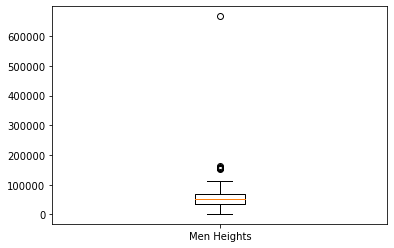

In [25]:
plt.boxplot(full_df.Income, labels=["Men Heights"])
plt.show()

In [26]:
#drop outlier
full_df.drop(full_df[full_df["Income"] > 200000].index, inplace=True)

In [27]:
full_df

,Age,Education,Marital_Status,Income,Spending,Loyalty_Duration,Children,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,WebPurchaes,CatalogPurchases,StorePurchases,NumWebVisitsMonth
0,57,Postgraduate,Alone,58138.0,1617,25.333333,0,58,635,88,546,172,88,88,3,8,10,4,7
1,60,Postgraduate,Alone,46344.0,27,7.000000,2,38,11,1,6,2,1,6,2,1,1,2,5
2,49,Postgraduate,In relationship,71613.0,776,13.633333,0,26,426,49,127,111,21,42,1,8,2,10,4
3,30,Postgraduate,In relationship,26646.0,53,7.866667,1,26,11,4,20,10,3,5,2,2,0,4,6
4,33,Postgraduate,In relationship,58293.0,422,8.600000,1,94,173,43,118,46,27,15,5,5,3,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,47,Postgraduate,In relationship,61223.0,1341,15.933333,1,46,709,43,182,42,118,247,2,9,3,4,5
2236,68,Postgraduate,In relationship,64014.0,444,3.866667,3,56,406,0,30,0,0,8,7,8,2,5,7
2237,33,Postgraduate,Alone,56981.0,1241,8.400000,0,91,908,48,217,32,12,24,1,2,3,13,6
2238,58,Postgraduate,In relationship,69245.0,843,8.433333,1,8,428,30,214,80,30,61,2,6,5,10,3


**Segmentation**

We going to do segmentation for income, age, loyalty, amount spending of product, and total customers spending

In [28]:
full_df["Age"].max()

121

In [29]:
#segmentation income
cut_labels_Income = ["Low income", "Low to medium income", "Medium to high income", "High income"]
full_df["Income_group"] = pd.qcut(full_df["Income"], q=4, labels=cut_labels_Income)

#segmentation Age
cut_labels_Age = ['Young', 'Adult', 'Mature', 'Senior']
cut_bins = [0, 29, 45, 65, 121]
full_df['Age_group'] = pd.cut(full_df['Age'], bins=cut_bins, labels=cut_labels_Age)

#segmentation loyalty
cut_labels_Loyalty = ['New customers', 'Discovering customers', 'Experienced customers', 'Loyal customers']
full_df['Loyalty_group'] = pd.qcut(full_df['Loyalty_Duration'], q=4, labels=cut_labels_Loyalty)

#segmentation product
cut_labels = ['Low consumer', 'Frequent consumer', 'Biggest consumer']
full_df['Wines_segment'] = pd.qcut(full_df['Wines'][full_df['Wines']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
full_df['Fruits_segment'] = pd.qcut(full_df['Fruits'][full_df['Fruits']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
full_df['Meat_segment'] = pd.qcut(full_df['Meat'][full_df['Meat']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
full_df['Fish_segment'] = pd.qcut(full_df['Fish'][full_df['Fish']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
full_df['Sweets_segment'] = pd.qcut(full_df['Sweets'][full_df['Sweets']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
full_df['Gold_segment'] = pd.qcut(full_df['Gold'][full_df['Gold']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
full_df.replace(np.nan, "Non consumer",inplace=True)

For the segmentation, we need to define the borders for every segmentation

In [30]:
# spending segmentation
quartile_spending = np.quantile(full_df.Spending, q=(0, .25, .75, 1))
print("spending segmentation:", quartile_spending)

# income segmentation
quartile_income = np.quantile(full_df.Income, q=(0, .25, .5, .75, 1))
print("income segmentation:", quartile_income)

# loyalty segmentation
quartile_loyalty = np.quantile(full_df.Loyalty_Duration, q=(0, .25, .5, .75, 1))
print("loyalty segmentation:", quartile_loyalty)

# wine segmentation
quartile_wine = np.quantile(full_df.Wines, q=(0, .25, .75, 1))
print("wine segmentation:", quartile_wine)

# fruits segmentation
quartile_fruits = np.quantile(full_df.Fruits, q=(0, .25, .75, 1))
print("fruits segmentation:", quartile_fruits)

# meat segmentation
quartile_meat = np.quantile(full_df.Meat, q=(0, .25, .75, 1))
print("meat segmentation:", quartile_meat)

# sweets segmentation
quartile_sweets = np.quantile(full_df.Sweets, q=(0, .25, .75, 1))
print("sweets segmentation:", quartile_sweets)

# fish segmentation
quartile_fish = np.quantile(full_df.Fish, q=(0, .25, .75, 1))
print("fish segmentation:", quartile_fish)

# gold segmentation
quartile_gold = np.quantile(full_df.Gold, q=(0, .25, .75, 1))
print("gold segmentation:", quartile_gold)

spending segmentation: [   5.   69. 1048. 2525.]
income segmentation: [  1730.  35284.  51373.  68487. 162397.]
loyalty segmentation: [ 3.23333333  9.23333333 15.06666667 20.86666667 26.53333333]
wine segmentation: [   0.   24.  505. 1493.]
fruits segmentation: [  0.   2.  33. 199.]
meat segmentation: [   0.    16.   232.5 1725. ]
sweets segmentation: [  0.   1.  33. 262.]
fish segmentation: [  0.   3.  50. 259.]
gold segmentation: [  0.   9.  56. 321.]


In [31]:
full_df

,Age,Education,Marital_Status,Income,Spending,Loyalty_Duration,Children,Recency,Wines,Fruits,...,NumWebVisitsMonth,Income_group,Age_group,Loyalty_group,Wines_segment,Fruits_segment,Meat_segment,Fish_segment,Sweets_segment,Gold_segment
0,57,Postgraduate,Alone,58138.0,1617,25.333333,0,58,635,88,...,7,Medium to high income,Mature,Loyal customers,Biggest consumer,Biggest consumer,Biggest consumer,Biggest consumer,Biggest consumer,Biggest consumer
1,60,Postgraduate,Alone,46344.0,27,7.000000,2,38,11,1,...,5,Low to medium income,Mature,New customers,Low consumer,Low consumer,Low consumer,Low consumer,Low consumer,Low consumer
2,49,Postgraduate,In relationship,71613.0,776,13.633333,0,26,426,49,...,4,High income,Mature,Discovering customers,Frequent consumer,Biggest consumer,Frequent consumer,Biggest consumer,Frequent consumer,Frequent consumer
3,30,Postgraduate,In relationship,26646.0,53,7.866667,1,26,11,4,...,6,Low income,Adult,New customers,Low consumer,Low consumer,Frequent consumer,Frequent consumer,Low consumer,Low consumer
4,33,Postgraduate,In relationship,58293.0,422,8.600000,1,94,173,43,...,5,Medium to high income,Adult,New customers,Frequent consumer,Frequent consumer,Frequent consumer,Frequent consumer,Frequent consumer,Frequent consumer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,47,Postgraduate,In relationship,61223.0,1341,15.933333,1,46,709,43,...,5,Medium to high income,Mature,Experienced customers,Biggest consumer,Frequent consumer,Frequent consumer,Frequent consumer,Biggest consumer,Biggest consumer
2236,68,Postgraduate,In relationship,64014.0,444,3.866667,3,56,406,0,...,7,Medium to high income,Senior,New customers,Frequent consumer,Non consumer,Frequent consumer,Non consumer,Non consumer,Low consumer
2237,33,Postgraduate,Alone,56981.0,1241,8.400000,0,91,908,48,...,6,Medium to high income,Adult,New customers,Biggest consumer,Biggest consumer,Frequent consumer,Frequent consumer,Frequent consumer,Frequent consumer
2238,58,Postgraduate,In relationship,69245.0,843,8.433333,1,8,428,30,...,3,High income,Mature,New customers,Frequent consumer,Frequent consumer,Frequent consumer,Biggest consumer,Frequent consumer,Biggest consumer


In [32]:
full_df['Total_Spending_segment'] = pd.qcut(full_df['Spending'][full_df['Spending']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")

In [33]:
full_df.Total_Spending_segment

0        Biggest consumer
1            Low consumer
2       Frequent consumer
3            Low consumer
4       Frequent consumer
              ...        
2235     Biggest consumer
2236    Frequent consumer
2237     Biggest consumer
2238    Frequent consumer
2239    Frequent consumer
Name: Total_Spending_segment, Length: 2215, dtype: object

In [34]:
full_df.columns

Index(['Age', 'Education', 'Marital_Status', 'Income', 'Spending',
       'Loyalty_Duration', 'Children', 'Recency', 'Wines', 'Fruits', 'Meat',
       'Fish', 'Sweets', 'Gold', 'NumDealsPurchases', 'WebPurchaes',
       'CatalogPurchases', 'StorePurchases', 'NumWebVisitsMonth',
       'Income_group', 'Age_group', 'Loyalty_group', 'Wines_segment',
       'Fruits_segment', 'Meat_segment', 'Fish_segment', 'Sweets_segment',
       'Gold_segment', 'Total_Spending_segment'],
      dtype='object')

In [35]:
full_df.shape

(2215, 29)

We want to know the correlation of numerics columns.

In [36]:
a = full_df[['Age', 'Income', 'Spending', 'Loyalty_Duration',
             'Children', 'Recency', 'Wines', 'Fruits', 'Meat',
             'Fish', 'Sweets', 'Gold', 'NumDealsPurchases']]
a

,Age,Income,Spending,Loyalty_Duration,Children,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases
0,57,58138.0,1617,25.333333,0,58,635,88,546,172,88,88,3
1,60,46344.0,27,7.000000,2,38,11,1,6,2,1,6,2
2,49,71613.0,776,13.633333,0,26,426,49,127,111,21,42,1
3,30,26646.0,53,7.866667,1,26,11,4,20,10,3,5,2
4,33,58293.0,422,8.600000,1,94,173,43,118,46,27,15,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,47,61223.0,1341,15.933333,1,46,709,43,182,42,118,247,2
2236,68,64014.0,444,3.866667,3,56,406,0,30,0,0,8,7
2237,33,56981.0,1241,8.400000,0,91,908,48,217,32,12,24,1
2238,58,69245.0,843,8.433333,1,8,428,30,214,80,30,61,2


In [37]:
a.corr()

,Age,Income,Spending,Loyalty_Duration,Children,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases
Age,1.000000,0.198064,0.113241,-0.020249,0.087429,0.016023,0.159225,0.017653,0.033499,0.040265,0.020013,0.064030,0.058953
Income,0.198064,1.000000,0.792650,-0.024126,-0.344035,0.006945,0.688269,0.507959,0.692465,0.520351,0.523746,0.389204,-0.108457
Spending,0.113241,0.792650,1.000000,0.158685,-0.500308,0.019706,0.893098,0.613249,0.845853,0.642311,0.606970,0.528599,-0.065521
Loyalty_Duration,-0.020249,-0.024126,0.158685,1.000000,-0.025948,0.026045,0.168155,0.067987,0.089644,0.081887,0.081048,0.160573,0.218463
Children,0.087429,-0.344035,-0.500308,-0.025948,1.000000,0.018322,-0.353782,-0.395900,-0.504574,-0.427852,-0.389426,-0.268922,0.436123
Recency,0.016023,0.006945,0.019706,0.026045,0.018322,1.000000,0.015370,-0.005971,0.022254,0.000331,0.024859,0.017417,0.002470
Wines,0.159225,0.688269,0.893098,0.168155,-0.353782,0.015370,1.000000,0.386977,0.568752,0.397602,0.390178,0.392588,0.009235
Fruits,0.017653,0.507959,0.613249,0.067987,-0.395900,-0.005971,0.386977,1.000000,0.547796,0.593407,0.571581,0.396443,-0.134416
Meat,0.033499,0.692465,0.845853,0.089644,-0.504574,0.022254,0.568752,0.547796,1.000000,0.573507,0.535048,0.359328,-0.121079
Fish,0.040265,0.520351,0.642311,0.081887,-0.427852,0.000331,0.397602,0.593407,0.573507,1.000000,0.583804,0.427056,-0.143062


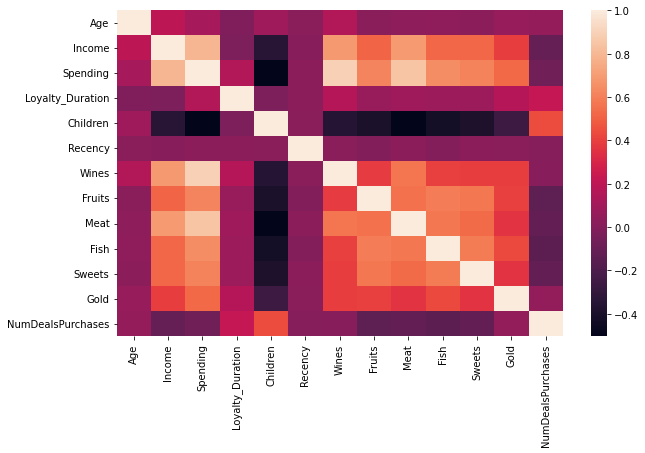

In [38]:
plt.figure(figsize=(10,6))
sns.heatmap(a.corr())
plt.show()

In [37]:
full_df.to_csv("project_1.csv", index=False)

## Link to the data visualization and the presentation

Link Data Visualization: https://datastudio.google.com/reporting/8dd76b24-4671-4ab5-9c40-ca3a1de5ae53/page/iUcgC

Link Presentation Deck: https://www.canva.com/design/DAExAlWfCk4/D9R9aMLpfWcMb8Wlo91rvA/view?utm_content=DAExAlWfCk4&utm_campaign=designshare&utm_medium=link&utm_source=shareyourdesignpanel